In [1]:
import os
#Change working directory
os.chdir('/Users/aleksandrabahareva/Downloads')

In [2]:
#packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

import warnings
warnings.filterwarnings('ignore')

In [7]:
df_merged = pd.read_csv('df_merged.csv', parse_dates=['Date'], index_col='Date')

In [8]:
df_merged.head()

,Unnamed: 0,Energy GW,BTC Price,BTC Volume,Fear Index,Fear Classification,S&P,Electricity Price NY
Date,,,,,,,,
2018-02-01,395,4.545488,9170.540039,9.959400e+09,30.0,Fear,2821.98,41.75
2018-02-02,396,4.549894,8830.750000,1.272690e+10,15.0,Extreme Fear,2762.13,73.63
2018-02-03,397,4.505991,9174.910156,7.263790e+09,40.0,Fear,2724.40,55.11
2018-02-04,398,4.537312,8277.009766,7.073550e+09,24.0,Extreme Fear,2686.67,39.05
2018-02-05,399,4.639257,6955.270020,9.285290e+09,11.0,Extreme Fear,2648.94,44.81


In [47]:
#Dickey–Fuller test. Data is stationary.
ad_fuller_result_1 = adfuller(df_merged["Energy GW"].diff()[1:])

print('Energy GW')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_merged["BTC Price"].diff()[1:])

print('BTC Price')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(df_merged["BTC Volume"].diff()[1:])

print('BTC Volume')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(df_merged["Fear Index"].diff()[1:])

print('Fear Index')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')

ad_fuller_result_5 = adfuller(df_merged["S&P"].diff()[1:])

print('S&P')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

print('\n---------------------\n')

ad_fuller_result_6 = adfuller(df_merged["Electricity Price NY"].diff()[1:])

print('Electricity Price NY')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

print('\n---------------------\n')

Energy GW
ADF Statistic: -7.6258346960119825
p-value: 2.0699496465251413e-11

---------------------

BTC Price
ADF Statistic: -7.750494818444608
p-value: 1.0050490018084839e-11

---------------------

BTC Volume
ADF Statistic: -13.574341688789431
p-value: 2.1841921050371707e-25

---------------------

Fear Index
ADF Statistic: -31.734379306531032
p-value: 0.0

---------------------

S&P
ADF Statistic: -7.800117241170156
p-value: 7.532482413081392e-12

---------------------

Electricity Price NY
ADF Statistic: -13.850948626939475
p-value: 7.006893988524071e-26

---------------------



In [48]:
#Granger Causality test. If p-value < 0.05 the hypothesis is true. 
# Energy GW causes BTC Price in lags 3 and 4.
print('Energy GW causes BTC Price?\n')
print('------------------')
granger_1 = grangercausalitytests(df_merged[['BTC Price', 'Energy GW']], 4)

#BTC Price causes Energy GW.
print('\BTC Price causes Energy GW?\n')
print('------------------')
granger_2 = grangercausalitytests(df_merged[['Energy GW', 'BTC Price']], 4)

Energy GW causes BTC Price?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7557  , p=0.3848  , df_denom=1389, df_num=1
ssr based chi2 test:   chi2=0.7573  , p=0.3842  , df=1
likelihood ratio test: chi2=0.7571  , p=0.3842  , df=1
parameter F test:         F=0.7557  , p=0.3848  , df_denom=1389, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3122  , p=0.0994  , df_denom=1386, df_num=2
ssr based chi2 test:   chi2=4.6411  , p=0.0982  , df=2
likelihood ratio test: chi2=4.6333  , p=0.0986  , df=2
parameter F test:         F=2.3122  , p=0.0994  , df_denom=1386, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3464  , p=0.0047  , df_denom=1383, df_num=3
ssr based chi2 test:   chi2=13.1052 , p=0.0044  , df=3
likelihood ratio test: chi2=13.0438 , p=0.0045  , df=3
parameter F test:         F=4.3464  , p=0.0047  , df_denom=1383, df_num=3

Granger Causality
number of lags (no ze

In [49]:
#Granger Causality test. If p-value < 0.05 the hypothesis is true. 
#Energy GW causes BTC Volume.
print('Energy GW causes BTC Volume?\n')
print('------------------')
granger_3 = grangercausalitytests(df_merged[['BTC Volume', 'Energy GW']], 4)

#BTC Volume does not cause Energy GW.
print('\BTC Volume causes Energy GW?\n')
print('------------------')
granger_4 = grangercausalitytests(df_merged[['Energy GW', 'BTC Volume']], 4)

Energy GW causes BTC Volume?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=255.0450, p=0.0000  , df_denom=1389, df_num=1
ssr based chi2 test:   chi2=255.5958, p=0.0000  , df=1
likelihood ratio test: chi2=234.6572, p=0.0000  , df=1
parameter F test:         F=255.0450, p=0.0000  , df_denom=1389, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=62.2432 , p=0.0000  , df_denom=1386, df_num=2
ssr based chi2 test:   chi2=124.9355, p=0.0000  , df=2
likelihood ratio test: chi2=119.6397, p=0.0000  , df=2
parameter F test:         F=62.2432 , p=0.0000  , df_denom=1386, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=22.7807 , p=0.0000  , df_denom=1383, df_num=3
ssr based chi2 test:   chi2=68.6880 , p=0.0000  , df=3
likelihood ratio test: chi2=67.0448 , p=0.0000  , df=3
parameter F test:         F=22.7807 , p=0.0000  , df_denom=1383, df_num=3

Granger Causality
number of lags (no z

In [50]:
#Granger Causality test. If p-value < 0.05 the hypothesis is true. 
#Energy GW causes Fear Index in lag 2.
print('Energy GW causes Fear Index?\n')
print('------------------')
granger_5 = grangercausalitytests(df_merged[['Fear Index', 'Energy GW']], 4)

#Fear Index causes Energy GW.
print('\Fear Index causes Energy GW?\n')
print('------------------')
granger_6 = grangercausalitytests(df_merged[['Energy GW', 'Fear Index']], 4)

Energy GW causes Fear Index?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2010  , p=0.1382  , df_denom=1389, df_num=1
ssr based chi2 test:   chi2=2.2057  , p=0.1375  , df=1
likelihood ratio test: chi2=2.2040  , p=0.1377  , df=1
parameter F test:         F=2.2010  , p=0.1382  , df_denom=1389, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1240  , p=0.0443  , df_denom=1386, df_num=2
ssr based chi2 test:   chi2=6.2706  , p=0.0435  , df=2
likelihood ratio test: chi2=6.2565  , p=0.0438  , df=2
parameter F test:         F=3.1240  , p=0.0443  , df_denom=1386, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9362  , p=0.1218  , df_denom=1383, df_num=3
ssr based chi2 test:   chi2=5.8381  , p=0.1198  , df=3
likelihood ratio test: chi2=5.8259  , p=0.1204  , df=3
parameter F test:         F=1.9362  , p=0.1218  , df_denom=1383, df_num=3

Granger Causality
number of lags (no z

In [51]:
#Granger Causality test. If p-value < 0.05 the hypothesis is true. 
#Energy GW does not cause S&P.
print('Energy GW causes S&P?\n')
print('------------------')
granger_7 = grangercausalitytests(df_merged[['S&P', 'Energy GW']], 4)

#S&P causes Energy GW.
print('\S&P causes Energy GW?\n')
print('------------------')
granger_8 = grangercausalitytests(df_merged[['Energy GW', 'S&P']], 4)

Energy GW causes S&P?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0384  , p=0.8447  , df_denom=1389, df_num=1
ssr based chi2 test:   chi2=0.0385  , p=0.8445  , df=1
likelihood ratio test: chi2=0.0385  , p=0.8445  , df=1
parameter F test:         F=0.0384  , p=0.8447  , df_denom=1389, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6471  , p=0.1930  , df_denom=1386, df_num=2
ssr based chi2 test:   chi2=3.3061  , p=0.1915  , df=2
likelihood ratio test: chi2=3.3021  , p=0.1918  , df=2
parameter F test:         F=1.6471  , p=0.1930  , df_denom=1386, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4561  , p=0.2248  , df_denom=1383, df_num=3
ssr based chi2 test:   chi2=4.3904  , p=0.2223  , df=3
likelihood ratio test: chi2=4.3835  , p=0.2229  , df=3
parameter F test:         F=1.4561  , p=0.2248  , df_denom=1383, df_num=3

Granger Causality
number of lags (no zero) 4


In [52]:
#Granger Causality test. If p-value < 0.05 the hypothesis is true. 
#Energy GW causes Electricity Price NY in lags 1 and 2.
print('Energy GW causes Electricity Price NY?\n')
print('------------------')
granger_9 = grangercausalitytests(df_merged[['Electricity Price NY', 'Energy GW']], 4)

#Electricity Price NY does not cause Energy GW.
print('\Electricity Price NY causes Energy GW?\n')
print('------------------')
granger_10 = grangercausalitytests(df_merged[['Energy GW', 'Electricity Price NY']], 4)

Energy GW causes Electricity Price NY?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8943  , p=0.0153  , df_denom=1389, df_num=1
ssr based chi2 test:   chi2=5.9071  , p=0.0151  , df=1
likelihood ratio test: chi2=5.8946  , p=0.0152  , df=1
parameter F test:         F=5.8943  , p=0.0153  , df_denom=1389, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5870  , p=0.0103  , df_denom=1386, df_num=2
ssr based chi2 test:   chi2=9.2071  , p=0.0100  , df=2
likelihood ratio test: chi2=9.1767  , p=0.0102  , df=2
parameter F test:         F=4.5870  , p=0.0103  , df_denom=1386, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3537  , p=0.0705  , df_denom=1383, df_num=3
ssr based chi2 test:   chi2=7.0969  , p=0.0689  , df=3
likelihood ratio test: chi2=7.0789  , p=0.0694  , df=3
parameter F test:         F=2.3537  , p=0.0705  , df_denom=1383, df_num=3

Granger Causality
number of 

In [193]:
df_merged1 = df_merged[['Energy GW', 'BTC Price']]

In [194]:
train_df1=df_merged1[:-30]
test_df1=df_merged1[-30:]

In [195]:
model1 = VAR(train_df1.diff()[1:])

In [196]:
sorted_order1=model1.select_order(maxlags=20)
print(sorted_order1.summary())
#* shows where is the minimum parameter. The minimum BIC was found at lag number 14.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        9.973       9.980   2.143e+04       9.975
1        9.904       9.928   2.002e+04       9.913
2        9.876       9.915   1.946e+04       9.891
3        9.870       9.925   1.935e+04       9.891
4        9.862       9.932   1.918e+04       9.888
5        9.861       9.947   1.917e+04       9.893
6        9.866       9.967   1.927e+04       9.904
7        9.695       9.811   1.624e+04       9.739
8        9.670       9.802   1.584e+04       9.720
9        9.667       9.814   1.578e+04       9.722
10       9.662       9.825   1.571e+04       9.723
11       9.663       9.842   1.573e+04       9.730
12       9.657       9.851   1.563e+04       9.729
13       9.657       9.867   1.564e+04       9.736
14       9.556      9.781*   1.413e+04       9.641
15       9.544       9.784   1.396e+04      9.634*
16       9.542       9.798   1.

In [197]:
var_model1 = VARMAX(train_df1, order=(14,0),enforce_stationarity= True)

In [198]:
fitted_model1 = var_model1.fit(disp=False)

In [78]:
#print(fitted_model1.summary())

In [199]:
n_forecast = 30
start=len(train_df1)
end=len(train_df1)+len(test_df1)-1
predict1 = fitted_model1.get_prediction(start=start,end=end) #start="2021-10-29",end="2021-11-27"

predictions1=predict1.predicted_mean

In [200]:
predictions1.columns=['Energy GW predicted','BTC Price predicted']

In [201]:
predictions1.index=df_merged.index[start:end+1]
#print(predictions1)

In [202]:
test_vs_pred1=pd.concat([test_df1['Energy GW'],predictions1['Energy GW predicted']],axis=1)

Text(0.5, 1.0, 'Energy GW forecast using BTC Price historical data')

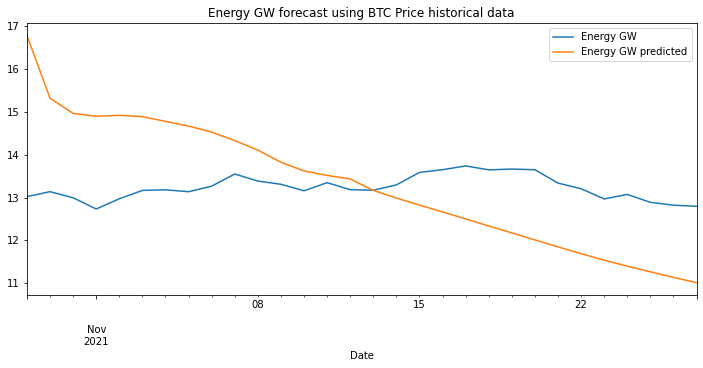

In [203]:
test_vs_pred1.plot(figsize=(12,5))
plt.title('Energy GW forecast using BTC Price historical data')

In [211]:
rmse_Energy_GW1=math.sqrt(mean_squared_error(predictions1['Energy GW predicted'],test_df1['Energy GW']))
print('Mean value of Energy GW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df1['Energy GW']),rmse_Energy_GW1))

Mean value of Energy GW is : 13.236316957554166. Root Mean Squared Error is :1.5313210017586432


In [100]:
df_merged2 = df_merged[['Energy GW', 'S&P']]

In [101]:
train_df2=df_merged2[:-30]
test_df2=df_merged2[-30:]

In [102]:
model2 = VAR(train_df2.diff()[1:])

In [103]:
sorted_order2=model2.select_order(maxlags=20)
print(sorted_order2.summary())
#* shows where is the minimum parameter. The minimum BIC was found at lag number 14.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.004       3.012       20.17       3.007
1        2.937       2.960       18.85       2.945
2        2.918       2.956       18.50       2.932
3        2.909       2.963       18.33       2.929
4        2.897       2.967       18.12       2.923
5        2.888       2.973       17.96       2.920
6        2.887       2.988       17.95       2.925
7        2.719       2.836       15.17       2.763
8        2.686       2.818       14.67       2.735
9        2.670       2.817       14.44       2.725
10       2.670       2.833       14.45       2.731
11       2.663       2.841       14.34       2.730
12       2.666       2.859       14.38       2.738
13       2.661       2.871       14.32       2.740
14       2.564      2.789*       12.99      2.649*
15       2.560       2.801       12.94       2.650
16       2.561       2.817     

In [104]:
var_model2 = VARMAX(train_df2, order=(14,0),enforce_stationarity= True)

In [105]:
fitted_model2 = var_model2.fit(disp=False)

In [107]:
#print(fitted_model2.summary())

In [108]:
n_forecast = 30
start=len(train_df2)
end=len(train_df2)+len(test_df2)-1
predict2 = fitted_model2.get_prediction(start=start,end=end) #start="2021-10-29",end="2021-11-27")

predictions2=predict2.predicted_mean

In [165]:
predictions2.columns=['Energy GW predicted','S&P predicted']

In [166]:
predictions2.index=df_merged.index[start:end+1]
#print(predictions)

In [167]:
test_vs_pred2=pd.concat([test_df2['Energy GW'],predictions2['Energy GW predicted']],axis=1)

Text(0.5, 1.0, 'Energy GW forecast using S&P 500 Index historical data')

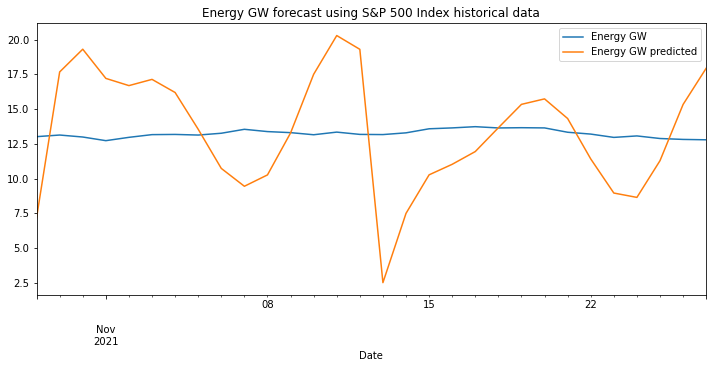

In [168]:
test_vs_pred2.plot(figsize=(12,5))
plt.title('Energy GW forecast using S&P 500 Index historical data')

In [210]:
rmse_Energy_GW2=math.sqrt(mean_squared_error(predictions2['Energy GW predicted'],test_df2['Energy GW']))
print('Mean value of Energy GW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df2['Energy GW']),rmse_Energy_GW2))

Mean value of Energy GW is : 13.236316957554166. Root Mean Squared Error is :4.248153119254431


In [114]:
df_merged3 = df_merged[['Energy GW', 'Electricity Price NY']]

In [115]:
train_df3=df_merged3[:-30]
test_df3=df_merged3[-30:]

In [116]:
model3 = VAR(train_df3.diff()[1:])

In [183]:
sorted_order3=model3.select_order(maxlags=20)
print(sorted_order3.summary())
#* shows where is the minimum parameter. The minimum AIC was found at lag number 17.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.092       1.100       2.981       1.095
1        1.016       1.039       2.761       1.024
2       0.9352      0.9740       2.548      0.9498
3       0.9034      0.9576       2.468      0.9237
4       0.8702      0.9400       2.387      0.8964
5       0.8596      0.9449       2.362      0.8916
6       0.8400      0.9408       2.316      0.8777
7       0.6712      0.7875       1.957      0.7147
8       0.6377      0.7695       1.892      0.6871
9       0.6331      0.7804       1.883      0.6883
10      0.6322      0.7950       1.882      0.6931
11      0.6292      0.8075       1.876      0.6960
12      0.6282      0.8220       1.874      0.7008
13      0.6312      0.8405       1.880      0.7096
14      0.5301     0.7549*       1.699      0.6143
15      0.5179      0.7582       1.679     0.6079*
16      0.5199      0.7757     

In [186]:
var_model3 = VARMAX(train_df3, order=(17,0),enforce_stationarity= True)

In [187]:
fitted_model3 = var_model3.fit(disp=False)

In [121]:
#print(fitted_model3.summary())

In [188]:
n_forecast = 30
start=len(train_df3)
end=len(train_df3)+len(test_df3)-1
predict3 = fitted_model3.get_prediction(start=start,end=end) #start="2021-10-29",end="2021-11-27")

predictions3=predict3.predicted_mean

In [189]:
predictions3.columns=['Energy GW predicted','Electricity Price NY predicted']

In [190]:
predictions3.index=df_merged.index[start:end+1]
#print(predictions)

In [191]:
test_vs_pred3=pd.concat([test_df3['Energy GW'],predictions3['Energy GW predicted']],axis=1)

Text(0.5, 1.0, 'Energy GW forecast using Electricity Price NY historical data')

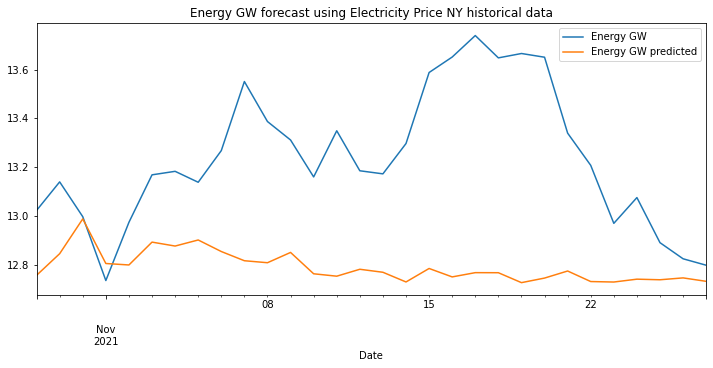

In [192]:
test_vs_pred3.plot(figsize=(12,5))
plt.title('Energy GW forecast using Electricity Price NY historical data')

In [209]:
rmse_Energy_GW3=math.sqrt(mean_squared_error(predictions3['Energy GW predicted'],test_df3['Energy GW']))
print('Mean value of Energy GW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df3['Energy GW']),rmse_Energy_GW3))

Mean value of Energy GW is : 13.236316957554166. Root Mean Squared Error is :0.5323964710599027


In [135]:
df_merged4 = df_merged[['Energy GW', 'Fear Index']]

In [136]:
train_df4=df_merged4[:-30]
test_df4=df_merged4[-30:]

In [137]:
model4 = VAR(train_df4.diff()[1:])

In [138]:
sorted_order4=model4.select_order(maxlags=20)
print(sorted_order4.summary())
#* shows where is the minimum parameter. The minimum AIC was found at lag number 15.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       0.1552      0.1629       1.168      0.1581
1      0.05097     0.07423       1.052     0.05968
2      0.02595     0.06472       1.026     0.04048
3      0.02064     0.07491       1.021     0.04097
4      0.01227     0.08204       1.012     0.03841
5      0.01104     0.09632       1.011     0.04298
6      0.01340      0.1142       1.013     0.05116
7      -0.1545    -0.03820      0.8569     -0.1109
8      -0.1792    -0.04738      0.8360     -0.1298
9      -0.1788    -0.03149      0.8363     -0.1236
10     -0.1755    -0.01269      0.8391     -0.1145
11     -0.1719    0.006438      0.8421     -0.1051
12     -0.1741     0.01970      0.8402     -0.1015
13     -0.1707     0.03860      0.8431    -0.09231
14     -0.2737   -0.04893*      0.7605     -0.1895
15    -0.2812*    -0.04087     0.7549*    -0.1912*
16     -0.2782    -0.02237     

In [139]:
var_model4 = VARMAX(train_df4, order=(15,0),enforce_stationarity= True)

In [140]:
fitted_model4 = var_model4.fit(disp=False)

In [173]:
#print(fitted_model4.summary())

In [142]:
n_forecast = 30
start=len(train_df4)
end=len(train_df4)+len(test_df4)-1
predict4 = fitted_model4.get_prediction(start=start,end=end) #start="2021-10-29",end="2021-11-27")

predictions4=predict4.predicted_mean

In [174]:
predictions4.columns=['Energy GW predicted','Fear Index predicted']

In [175]:
predictions4.index=df_merged.index[start:end+1]
#print(predictions)

In [176]:
test_vs_pred4=pd.concat([test_df4['Energy GW'],predictions4['Energy GW predicted']],axis=1)

Text(0.5, 1.0, 'Energy GW forecast using Fear Index historical data')

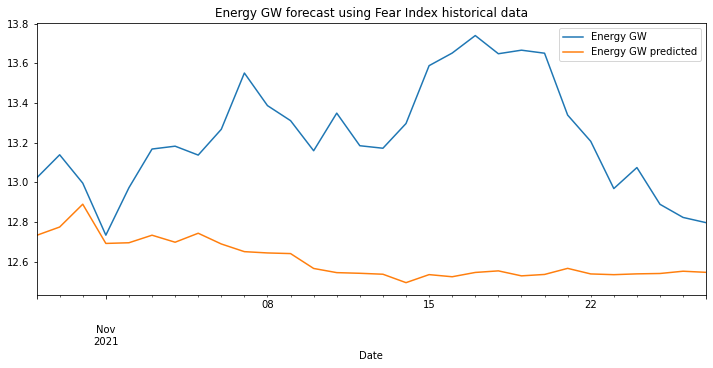

In [177]:
test_vs_pred4.plot(figsize=(12,5))
plt.title('Energy GW forecast using Fear Index historical data')

In [213]:
rmse_Energy_GW4=math.sqrt(mean_squared_error(predictions4['Energy GW predicted'],test_df4['Energy GW']))
print('Mean value of Energy GW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df4['Energy GW']),rmse_Energy_GW4))

Mean value of Energy GW is : 13.236316957554166. Root Mean Squared Error is :0.7027285651941763


In [238]:
df_merged5 = df_merged[['Energy GW', 'Electricity Price NY', 'Fear Index']]

In [222]:
train_df5=df_merged5[:-30]
test_df5=df_merged5[-30:]

In [223]:
model5 = VAR(train_df5.diff()[1:])

In [224]:
sorted_order5=model5.select_order(maxlags=20)
print(sorted_order5.summary())
#* shows where is the minimum parameter. The minimum BIC was found at lag number 7.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        5.020       5.031       151.4       5.024
1        4.895       4.942       133.7       4.913
2        4.814       4.895       123.2       4.844
3        4.788       4.904       120.0       4.831
4        4.758       4.909       116.5       4.815
5        4.746       4.932       115.2       4.816
6        4.733       4.954       113.7       4.816
7        4.561      4.817*       95.70       4.657
8        4.528       4.819       92.60       4.637
9        4.529       4.855       92.69       4.651
10       4.533       4.893       93.03       4.668
11       4.535       4.930       93.21       4.683
12       4.529       4.960       92.70       4.691
13       4.536       5.001       93.35       4.711
14       4.438       4.938       84.57      4.625*
15      4.428*       4.963      83.75*       4.628
16       4.431       5.001     

In [225]:
var_model5 = VARMAX(train_df5, order=(7,0),enforce_stationarity= True)

In [226]:
fitted_model5 = var_model5.fit(disp=False)

In [227]:
#print(fitted_model5.summary())

In [273]:
n_forecast = 30
start=len(train_df5)
end=len(train_df5)+len(test_df5)-1
predict5 = fitted_model5.get_prediction(start=start,end=end) #start="2021-10-29",end="2021-11-27")

predictions5=predict5.predicted_mean

In [274]:
predictions5.columns=['Energy GW predicted','Electricity Price NY predicted', 'Fear Index predicted']

In [275]:
predictions5.index=df_merged.index[start:end+1]
#print(predictions)

In [232]:
test_vs_pred5=pd.concat([test_df5['Energy GW'],predictions['Energy GW predicted']],axis=1)

Text(0.5, 1.0, 'Energy GW forecast using Electricity Price NY and Fear Index historical data')

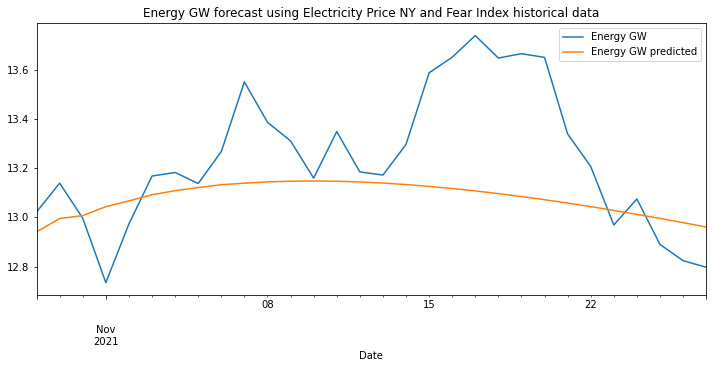

In [233]:
test_vs_pred5.plot(figsize=(12,5))
plt.title('Energy GW forecast using Electricity Price NY and Fear Index historical data')

In [234]:
rmse_Energy_GW5=math.sqrt(mean_squared_error(predictions5['Energy GW predicted'],test_df5['Energy GW']))
print('Mean value of Energy GW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df5['Energy GW']),rmse_Energy_GW5))

Mean value of Energy GW is : 13.236316957554166. Root Mean Squared Error is :0.2911503424472609


In [302]:
n_forecast = 30
start=len(df_merged5)
end=len(df_merged5)+30-1
predict5_future = fitted_model5.get_prediction(start=start,end=end) #start="2021-11-28",end="2021-12-27")

predictions5_future=predict5_future.predicted_mean

In [303]:
predictions5_future.columns=['Energy GW predicted','Electricity Price NY predicted', 'Fear Index predicted']

In [304]:
#predictions5_future.index=df_merged.index[start:end+30+1]
#print(predictions)
index_future_dates=pd.date_range(start='2021-11-28',end='2021-12-27')

In [305]:
predictions5_future.index=index_future_dates
print(predictions5_future)

            Energy GW predicted  Electricity Price NY predicted  \
2021-11-28            12.942495                       37.056097   
2021-11-29            12.923697                       36.936046   
2021-11-30            12.904455                       36.824908   
2021-12-01            12.884801                       36.721948   
2021-12-02            12.864765                       36.626364   
2021-12-03            12.844376                       36.537483   
2021-12-04            12.823660                       36.454752   
2021-12-05            12.802642                       36.377663   
2021-12-06            12.781345                       36.305754   
2021-12-07            12.759791                       36.238613   
2021-12-08            12.738000                       36.175856   
2021-12-09            12.715991                       36.117105   
2021-12-10            12.693783                       36.062014   
2021-12-11            12.671392                       36.01026

Text(0.5, 1.0, 'Energy GW forecast using Electricity Price NY and Fear Index historical data')

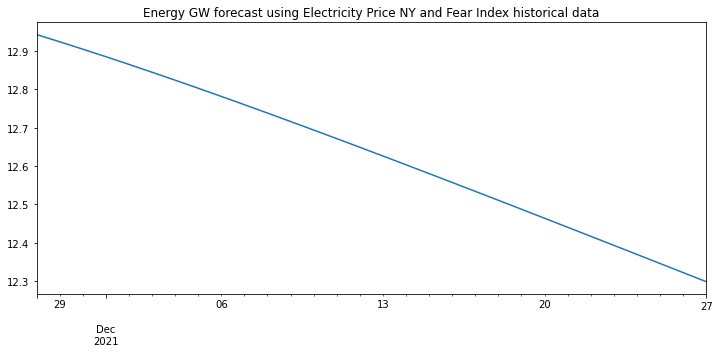

In [306]:
predictions5_future['Energy GW predicted'].plot(figsize=(12,5))
plt.title('Energy GW forecast using Electricity Price NY and Fear Index historical data')

In [239]:
df_merged6 = df_merged[['Energy GW','Electricity Price NY', 'Fear Index', 'BTC Price', 'S&P']]

In [240]:
train_df6=df_merged6[:-30]
test_df6=df_merged6[-30:]

In [241]:
model6 = VAR(train_df6.diff()[1:])

In [242]:
sorted_order6=model6.select_order(maxlags=20)
print(sorted_order6.summary())
#* shows where is the minimum parameter. The minimum AIC was found at lag number 15.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        25.52       25.54   1.209e+11       25.53
1        25.12      25.24*   8.127e+10       25.16
2        25.03       25.24   7.390e+10       25.11
3        25.01       25.32   7.287e+10       25.13
4        24.99       25.40   7.123e+10       25.14
5        24.99       25.49   7.098e+10       25.17
6        24.98       25.58   7.077e+10       25.21
7        24.81       25.51   5.961e+10       25.07
8        24.76       25.56   5.687e+10      25.06*
9        24.77       25.66   5.703e+10       25.10
10       24.77       25.76   5.731e+10       25.14
11       24.76       25.85   5.690e+10       25.17
12       24.77       25.95   5.725e+10       25.21
13       24.78       26.06   5.776e+10       25.26
14       24.70       26.07   5.326e+10       25.21
15      24.70*       26.17  5.321e+10*       25.25
16       24.71       26.28   5.

In [254]:
var_model6 = VARMAX(train_df6, order=(15,0),enforce_stationarity= True)

In [255]:
fitted_model6 = var_model6.fit(disp=False)

In [253]:
#print(fitted_model6.summary())

In [256]:
n_forecast = 30
start=len(train_df6)
end=len(train_df6)+len(test_df6)-1
predict6 = fitted_model6.get_prediction(start=start,end=end) #start="2021-10-29",end="2021-11-27")

predictions6=predict6.predicted_mean

In [257]:
predictions6.columns=['Energy GW predicted','Electricity Price NY predicted', 'Fear Index predicted', 'BTC Price predicted', 'S&P predicted']

In [258]:
predictions6.index=df_merged.index[start:end+1]
#print(predictions)

In [259]:
test_vs_pred6=pd.concat([test_df6['Energy GW'],predictions6['Energy GW predicted']],axis=1)

Text(0.5, 1.0, 'Energy GW forecast using Electricity Price NY, Fear Index, BTC Price, and S&P 500 Index historical data')

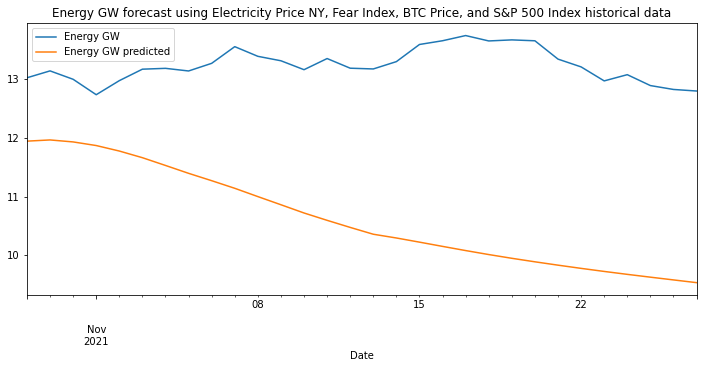

In [260]:
test_vs_pred6.plot(figsize=(12,5))
plt.title('Energy GW forecast using Electricity Price NY, Fear Index, BTC Price, and S&P 500 Index historical data')